# Corpus Inspection - Descriptive Stats

## Imports

In [1]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Preparing Dataset - Full Corpus

In [2]:
df = pd.read_csv('../results/tfidf.csv').drop('Unnamed: 0', axis= 1)
df.head(5)

,Filename,Top 10 TF-IDF Words
0,fran_q1_2011.txt,"[('border', 0.34642789292616993), ('detection'..."
1,afic_2017.txt,"[('afic', 0.49029092129688284), ('niger', 0.25..."
2,2023.11.16_frontex-general-industry-days-innov...,"[('industry', 0.3508179021509025), ('innovatio..."
3,ara-2022-public-web.txt,"[('border', 0.34045937196548115), ('eu', 0.267..."
4,afic_2016.txt,"[('afic', 0.5395538529664771), ('niger', 0.193..."


### Add Publication Year Column

In [3]:
## Meta data such as year of publication or region will be added based on title
df['Year'] = df['Filename'].str.extract('(\d{4})')
print(df.to_string())

                                                                                          Filename                                                                                                                                                                                                                                                                                                                                                       Top 10 TF-IDF Words  Year
0                                                                                 fran_q1_2011.txt                            [('border', 0.34642789292616993), ('detection', 0.2772558869051758), ('eu', 0.2514809889389974), ('illegal', 0.18219672568054407), ('tunisian', 0.17893065257537633), ('nationality', 0.1786102143660389), ('number', 0.15692937613157618), ('national', 0.14123643851841855), ('member', 0.13862094891622562), ('state', 0.1307744801096468)]  2011
1                                                                 

In [4]:
# some filenames do not include a year, since it is only few, these will be looked up manually
with pd.option_context('display.max_colwidth', None): 
    print(df.loc[df['Year'].isna(), 'Filename'])

19                  situational_overview_on_trafficking_in_human_beings.txt
85    common-integrated-risk-analysis-model-version-summary-booklet-2.1.txt
90                            unaccompanied_minors_in_migration_process.txt
Name: Filename, dtype: object


In [5]:
# Assign a new Year values
df.loc[df['Filename'] == 'situational_overview_on_trafficking_in_human_beings.txt', 'Year'] = 2011  
df.loc[df['Filename'] == 'common-integrated-risk-analysis-model-version-summary-booklet-2.1.txt', 'Year'] = 2021  
df.loc[df['Filename'] == 'unaccompanied_minors_in_migration_process.txt', 'Year'] = 2010  
# convert Year column to integer type
df['Year'] = pd.to_numeric(df['Year'])

In [6]:
#check if numbers make sense
print(min(df['Year']), max(df['Year']))

20 2023


In [7]:
df.loc[df['Year'] == 20, 'Filename']

69    0020.5032_en_16.txt
Name: Filename, dtype: object

In [8]:
#it seems the year should in fact be 2016
df.loc[df['Filename'] == '0020.5032_en_16.txt', 'Year'] = 2016  
#check if numbers make sense now
print(min(df['Year']), max(df['Year']))

2010 2023


### Add Region Column

In [9]:
# Define a dictionary mapping parts-of-filename to region values
conditions_to_region = {
    'fran_': 'Global',
    'risk_analysis' : 'Global',
    'eap-': 'Eastern Partnerships',
    'afic_': 'Africa',
    'wb_': 'Western Balkans',
    'eb_': 'Eastern European Borders'   
}

In [10]:
#apply mapping to create new Region column
df['Region'] = df['Filename'].apply(
    lambda filename: next((region for condition, region in conditions_to_region.items() if condition in filename), 'Other')
)
print(df.to_string())

                                                                                          Filename                                                                                                                                                                                                                                                                                                                                                       Top 10 TF-IDF Words  Year                    Region
0                                                                                 fran_q1_2011.txt                            [('border', 0.34642789292616993), ('detection', 0.2772558869051758), ('eu', 0.2514809889389974), ('illegal', 0.18219672568054407), ('tunisian', 0.17893065257537633), ('nationality', 0.1786102143660389), ('number', 0.15692937613157618), ('national', 0.14123643851841855), ('member', 0.13862094891622562), ('state', 0.1307744801096468)]  2011                    Global
1             

In [11]:
df.to_csv('../results/tfidf_enriched.csv')

## Preparing Dataset - Annual Reports Only

In [22]:
data = pd.read_csv('../results/tfidf_annual.csv').drop('Unnamed: 0', axis= 1)
data.head(5)

,Filename,Top 10 TF-IDF Words
0,risk_analysis_for_2019ws.txt,"[('border', 0.3653070781879702), ('na', 0.2459..."
1,annual_risk_analysis_2017ws.txt,"[('border', 0.36093753795957656), ('eu', 0.249..."
2,risk_analysis_for_2018ws.txt,"[('border', 0.3940470298850306), ('number', 0...."
3,risk_analysis_2021-2.txt,"[('border', 0.4378720407730829), ('eu', 0.2090..."
4,strategic-risk-analysis-2020.txt,"[('border', 0.38609257133408537), ('eu', 0.311..."


In [23]:
## Meta data such as year of publication or region will be added based on title
data['Year'] = data['Filename'].str.extract('(\d{4})')
# some filenames do not include a year, since it is only few, these will be looked up manually
with pd.option_context('display.max_colwidth', None): 
    print(df.loc[df['Year'].isna(), 'Filename'])

Series([], Name: Filename, dtype: object)


In [24]:
#change data type of year to int with no decimal places
data['Year'] = data['Year'].astype(int)
#check if numbers make sense
print(min(data['Year']), max(data['Year']))

2010 2022


In [25]:
data.to_csv('../results/tfidf_enriched_annual.csv')

## Visualizations

### Set Parameters for Seaborn

In [12]:
# efault figure size
sns.set(rc={'figure.figsize': (15, 5)})

#color palette
#sns.set_palette('Paired')
sns.color_palette('magma', as_cmap=True)

#other
sns.set_context('paper')
sns.set_style('ticks') 
sns.axes_style('ticks')

# Display settings
plt.rcParams.update({'axes.labelsize': 'large', 'axes.titlesize': 'large'})

### Number of Reports Published

In [13]:
#group df by Year and count publications
year_counts = df.groupby('Year')['Filename'].count().reset_index()
year_counts.columns = ['Year', 'Publications']

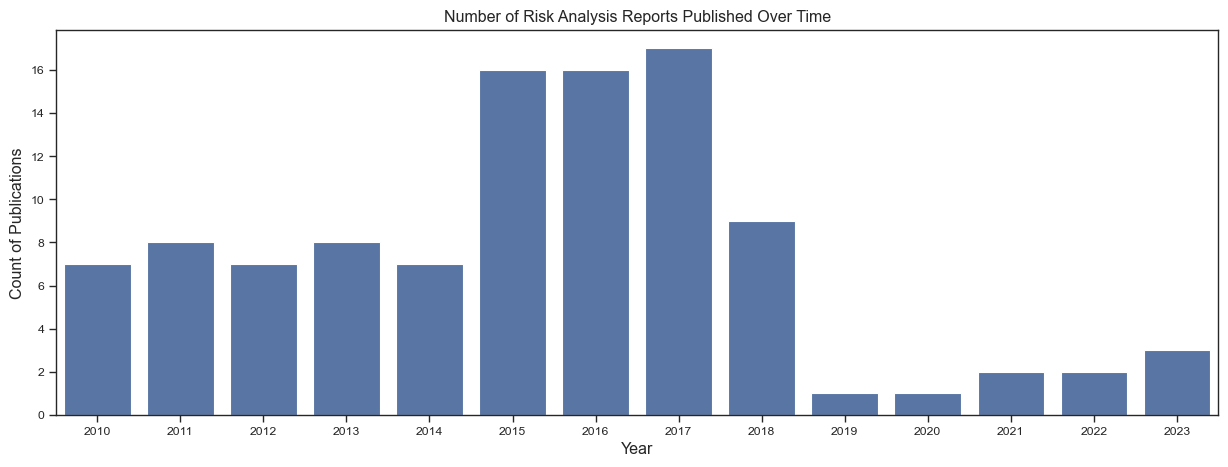

In [14]:
#plot count only
sns.barplot(x='Year', y='Publications', data=year_counts, errorbar=None)
plt.xlabel('Year')
plt.ylabel('Count of Publications')
plt.title('Number of Risk Analysis Reports Published Over Time')
#save plot
plt.savefig('../results/number_of_reports_over_time.png')
plt.show()

### Number of Reports Published by Region

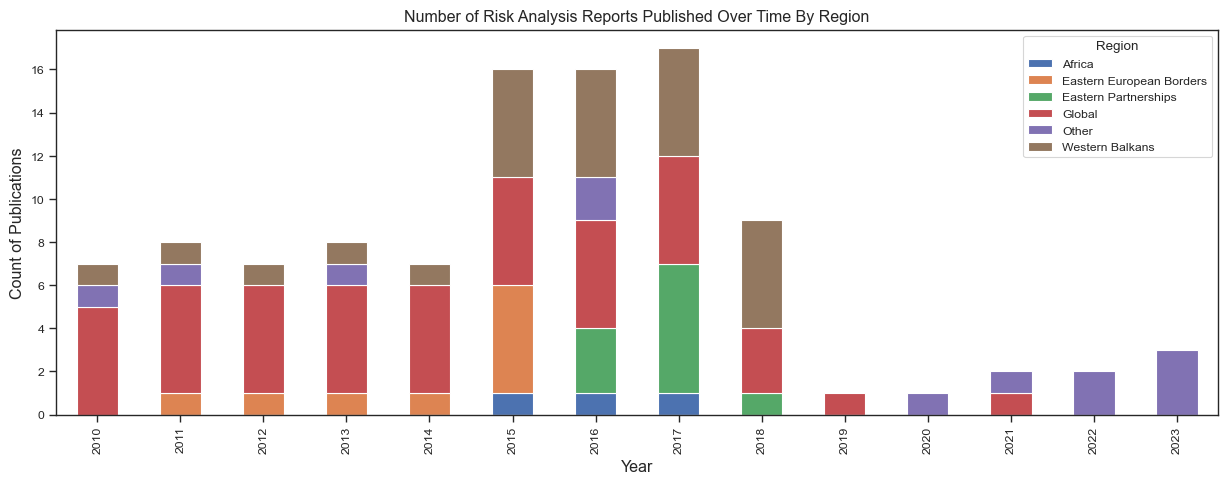

In [15]:
#group df by Year and Region and count publications
year_region_counts = df.groupby(['Year', 'Region']).size().unstack(fill_value=0)
year_region_counts.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Count of Publications')
plt.title('Number of Risk Analysis Reports Published Over Time By Region')
#save plot
plt.savefig('../results/number_of_reports_by_region.png')
plt.show()